In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
import warnings

<h1>
   <font size="5" face = "Times New Roma" color='#270336'>
     The softmax function.Optimization problem in Cross-entropy Loss
   </font> 
 </h1>

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" >
    </a>
    <font face = "Times New Roma" size="4"  color='#270336'>
        author: daodeiv (David Stankov) 
    </font>
</p>      
</h2>   

In [3]:
#generate  records refer to tractor label with random physical size between [4,5] 
tractor_dataframe= pd.DataFrame(data=np.random.random((30, 3))+3,columns = ['x_size','y_size','z_size'])
tractor_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Tractor').T)

#generate  records refer to car label with random physical size between [1,2]  
car_dataframe= pd.DataFrame(data=np.random.random((30, 3)) + 1,columns = ['x_size','y_size','z_size'])
car_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Car').T)

#generate  records refer to car label with random physical size between [2,3]  
bus_dataframe= pd.DataFrame(data=np.random.random((30, 3))+2,columns = ['x_size','y_size','z_size'])
bus_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Bus').T)

# joint each data frame into  one
original_data = tractor_dataframe.append(bus_dataframe).append(car_dataframe)
data = pd.get_dummies(original_data) 
data

,x_size,y_size,z_size,label_Bus,label_Car,label_Tractor
0,3.264366,3.805980,3.477372,0,0,1
1,3.997451,3.115659,3.897728,0,0,1
2,3.084445,3.031143,3.715579,0,0,1
3,3.308308,3.274491,3.621352,0,0,1
4,3.313235,3.608021,3.890563,0,0,1
...,...,...,...,...,...,...
25,1.881612,1.594303,1.731179,0,1,0
26,1.894010,1.738412,1.863288,0,1,0
27,1.281983,1.125129,1.574829,0,1,0
28,1.110149,1.037065,1.258435,0,1,0


In [4]:
original_data['label'].unique()

array(['Tractor', 'Bus', 'Car'], dtype=object)


<font size="4" color='#270336' face = "Times New Roma">
&nbsp;&nbsp;The class (target)  values can be Car, Bus, Tractor. In our working data, the label values are expressed as one-hot encoding variables or so-called dummies. This numerical representation of non-numerical data just allows mathematical manipulation over them.
</font>    
<br> 


<h6>
     <font size="3" color='#270336' face = "Times New Roma" >
        &nbsp;&nbsp; Let to visualize the data  using  Scatter plot :  
</font>    
</h6>  

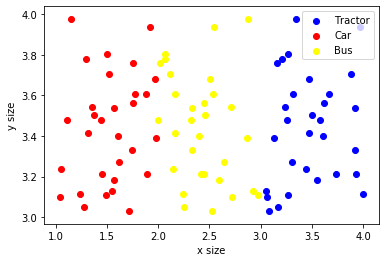

In [5]:
plt.scatter(tractor_dataframe['x_size'],tractor_dataframe['y_size'],label='Tractor',color='blue')
plt.scatter(car_dataframe['x_size'],tractor_dataframe['y_size'],label='Car',color='red')
plt.scatter(bus_dataframe['x_size'],tractor_dataframe['y_size'],label='Bus',color='yellow')
plt.xlabel('x size')
plt.ylabel('y size')
plt.legend()

In [6]:
x_train = np.array(data.drop(['label_Bus','label_Car','label_Tractor'], axis = 1)) # gets the target label variables
y_train = np.array(data[['label_Bus','label_Car','label_Tractor']]) # gets feature variables 
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=42) #separats into test and train samples 

print('shape of x train (M, N)', X_train.shape)
print('shape of y label (M, K)', y_train.shape )

shape of x train (M, N) (60, 3)
shape of y label (M, K) (60, 3)


<h5 style="margin-right: 45px; margin-left: 45px">
<font size="3" color='#270336' face = "Times New Roma">
        &nbsp;&nbsp; Let to implement softmax function: <br>
</font>    
</h5>  

In [7]:
def softmax(X, W, B):
    '''
    softmax function  
    takes :
    X = training data
    W =  weight matrix
    b = bias vector (intercept) 
    return :
      softmax for every z unit e^{k_ij}/Sum(e^{k_i1}+e^{k_i2}+e^{k_i3})
    '''
    #dot product between X_data matrix  and tranposed Weight_ matrix added to Bias  gives matrix each z_ij
    Z = X.dot(W.T)+B 
    
    #return matrix cosist of exponentials Z input net
    exp_z = np.exp(X.dot(W.T)+B)
    
    #array contains sum  of every row  (e^z_{ik})
    sums=np.sum(exp_z, axis=1) 
    
    #return softmax(Z)_{ij}
    return (exp_z.T/sums).T 


In [ ]:
def perform_gradient(X,y,max_iter=300,learning_rate=0.1,innitial_value = 10, debug_W=None):
    bias = np.full((y.shape[1],),innitial_value)
    W = np.full((X.shape[1], y.shape[1]), innitial_value)
    m = X.shape[0]
    gamma = (1/m)*learning_rate
    debug_mode = (debug_W is not None) 
    if debug_mode: debug_W = W[1]
    
    for i in range(max_iter):
        B = softmax(X,W,bias)-y
        W = W - gamma*B.T.dot(X)
        bias =bias - gamma*np.sum(B, axis=0)
        if debug_W is not None:
            #debug_W = np.append(W, W[debug_W], axis=0)
            print(debug_W)
    
    if debug_mode :
        return W,bias,W

    return debug_W

#         if np.isnan(w_delta).any() or np.isnan(b_delta).any():
#             warnings.warn('The iteration process has been interrupted because  some value became infinity.')
#             break;     

In [13]:
def perform_gradient(X,y,max_iter=300,learning_rate=0.1,innitial_value =1, debug_W=None):
    
    print('fuck',max_iter)  
    #debug values of wieght matrix
    debug_mode = False
    if debug_W is not None: debug_mode=True 
    
    bias = np.full((y.shape[1],),innitial_value)
    W = np.full((X.shape[1], y.shape[1]), innitial_value)
    if debug_mode:  debug = W[(debug_W)]
    m = X.shape[0] 
    gamma = (1/m)*learning_rate
    
    for i in range(max_iter):
        B = softmax(X,W,bias)-y
        W = W - gamma*B.T.dot(X)
        bias = bias - gamma*np.sum(B, axis=0)
        if debug_mode: debug = np.append(debug, W[debug_W])
    
    if debug_mode: 
            return W,bias,debug
    print('fuck',max_iter)    
    return W,bias

W,b,k = perform_gradient(X_train,y_train,max_iter=10**4,learning_rate=0.1,debug_W=(0,1))
k

fuck 10000


array([1.        , 1.00200547, 1.00786255, ..., 1.8964879 , 1.89648878,
       1.89648966])

In [16]:
print('original data label Y :  ')
print(y_test[1:10])
print('')
print("predicted data label Y' :")
print(

original data label Y :  
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]

predicted data label Y' :
[[0.04 0.   0.96]
 [0.83 0.05 0.11]
 [0.03 0.97 0.  ]
 [0.08 0.   0.92]
 [0.05 0.   0.95]
 [0.87 0.12 0.01]
 [0.21 0.79 0.  ]
 [0.04 0.   0.96]
 [0.86 0.09 0.05]]


In [ ]:
x = np.linspace(1,100,len(k))
plt.plot(x,k)
plt.xscale('log')
#plt.show()
#plt.plot(x,k)
#plt.show()
#plt.plot(x,np.exp(k))

In [ ]:
# x = np.linspace(1,100000,len(k))
# plt.plot(x,k)
# plt.xscale('log')
# plt.show()
# plt.plot(x,k)
# #plt.show()
# #plt.plot(x,np.exp(k))
# def plot_weight(W):
#     """
    
#     """
fig, axs = plt.subplots(4, 4,figsize=(20,20))        
for i in range(4):
    for j in range(4):
        learning_rate = 0.1*(i+1)*3
        max_iter = 10**(j+1)   
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        axs[i, j].set_title('l-{} it={}'.format(learning_rate,max_iter))
        x = np.linspace(1,100000,len(k))
        axs[i, j].plot(x,k)
'''

  size = np.sqrt(num)  
    a = cartesian(1,100,num)
  
    x = np.linspace(-10,10,30)
    if not size.is_integer():
        raise ValueError("num must has precise  root of integer type ")
    size = int(size)
    f
    for i in range(size):
        for j in range(size):
            axs[i, j].set_title('a = {} ,b = {}'.format(i,j)  )
            y=sigmoid(x,i,j)
            axs[i, j].plot(x,y)
'''        


In [ ]:
fig, axs = plt.subplots(4, 4,figsize=(20,20))        
for i in range(4):
    for j in range(4):
        learning_rate = 0.1*(i+1)*4
        max_iter = 10**(j+1)   
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        axs[i, j].set_title('l-{} it={}'.format(learning_rate,max_iter))
        x = np.linspace(1,100000,len(k))
        axs[i, j].plot(x,k)

In [ ]:

fig, axs = plt.subplots(4, 4,figsize=(20,20))        
for i in range(4):
    for j in range(4):
        learning_rate = 0.1*(i+1)*7
        max_iter = 10**(j+1)   
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        axs[i, j].set_title('l-{} it={}'.format(learning_rate,max_iter))
        x = np.linspace(1,100000,len(k))
        axs[i, j].plot(x,k)

In [ ]:
W,b,k = perform_gradient(X_train,y_train,max_iter=10000,learning_rate=0.8,debug_W=(0,1))
print('original data label Y :  ')
print(y_train[1:20])
print('')
print("predicted data label Y' :")
print(np.around(softmax(X_train,W,b)[1:20],2))


In [ ]:
plt.xscale('log')
fig, axs = plt.subplots(4, 4,figsize=(20,20))        
for i in range(4):
    for j in range(4):
        learning_rate = 0.1*(i+1)*4
        max_iter = 10**(j+1)   
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        axs[i, j].set_title('l-{} it={}'.format(learning_rate,max_iter))
        x = np.linspace(1,100000,len(k))
        axs[i, j].plot(np.log(x),k)
        


In [46]:

#perform_gradient(X,y,max_iter=300,learning_rate=0.1,innitial_value =1, debug_W=None)

(150, 4)
(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#references
https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/